In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import yfinance as yf

In [2]:
import yfinance as yf
import datetime as dt
tickers = ['TCS.NS', 'TRIDENT.NS','TATAMOTORS.NS']
start = dt.datetime.today() - dt.timedelta(5 * 365)
end = dt.datetime.today()

for i in tickers:
    data = yf.download(i,start,end)
    data.to_csv(f'{i}.csv', index=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
tcs = pd.read_csv('TCS.NS.csv')
tata = pd.read_csv('TATAMOTORS.NS.csv')
trident = pd.read_csv('TRIDENT.NS.csv')
tcs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-25,2094.0,2130.000000,2075.050049,2124.949951,1941.090210,3954245
1,2019-10-27,2129.0,2129.000000,2108.800049,2115.699951,1932.640747,224405
2,2019-10-29,2121.5,2201.699951,2121.500000,2194.850098,2004.941895,5064173
3,2019-10-30,2225.0,2260.000000,2176.850098,2252.800049,2057.878174,5195136
4,2019-10-31,2250.0,2284.949951,2237.000000,2269.649902,2073.270020,4879261


(990, 2)
(246, 2)

RMSE value on validation set:
708.283658388394


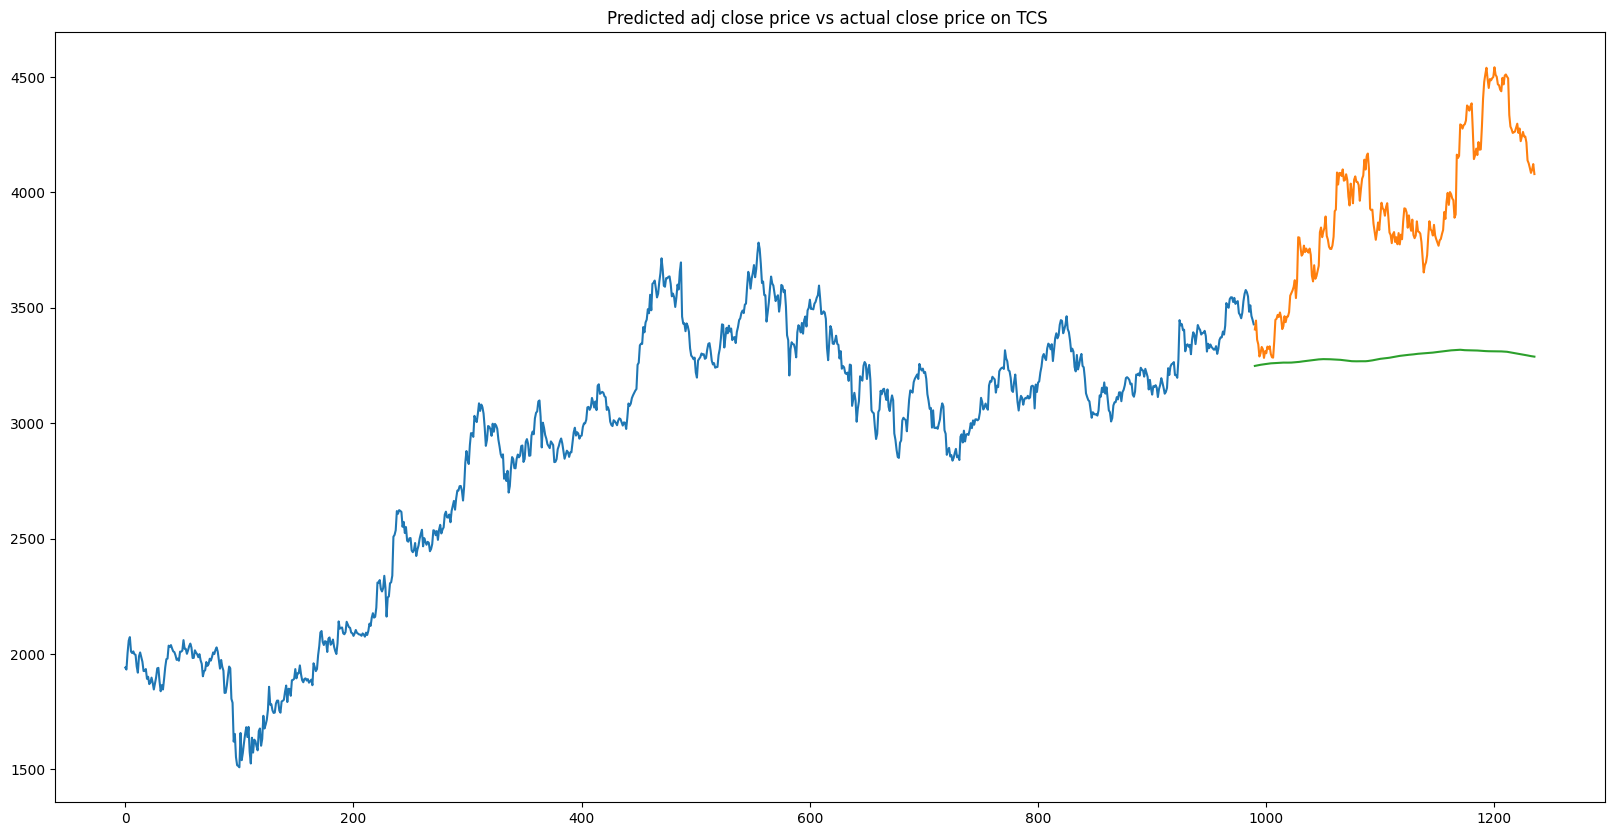

In [4]:
tcs.index=tcs['Date']

tcs_df = tcs.sort_index(ascending=True, axis=0)
tcs_new = pd.DataFrame(index=range(0, len(tcs)), columns=['Date', 'Adj Close'])

for i in range(0,len(tcs_df)):
    tcs_new['Date'][i] = tcs_df['Date'][i]
    tcs_new['Adj Close'][i] = tcs_df['Adj Close'][i]

#splitting training and validation dataset
train = tcs_new[:990]
valid = tcs_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid=valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on TCS ');

(990, 2)
(246, 2)

RMSE value on validation set:
390.3382015149929


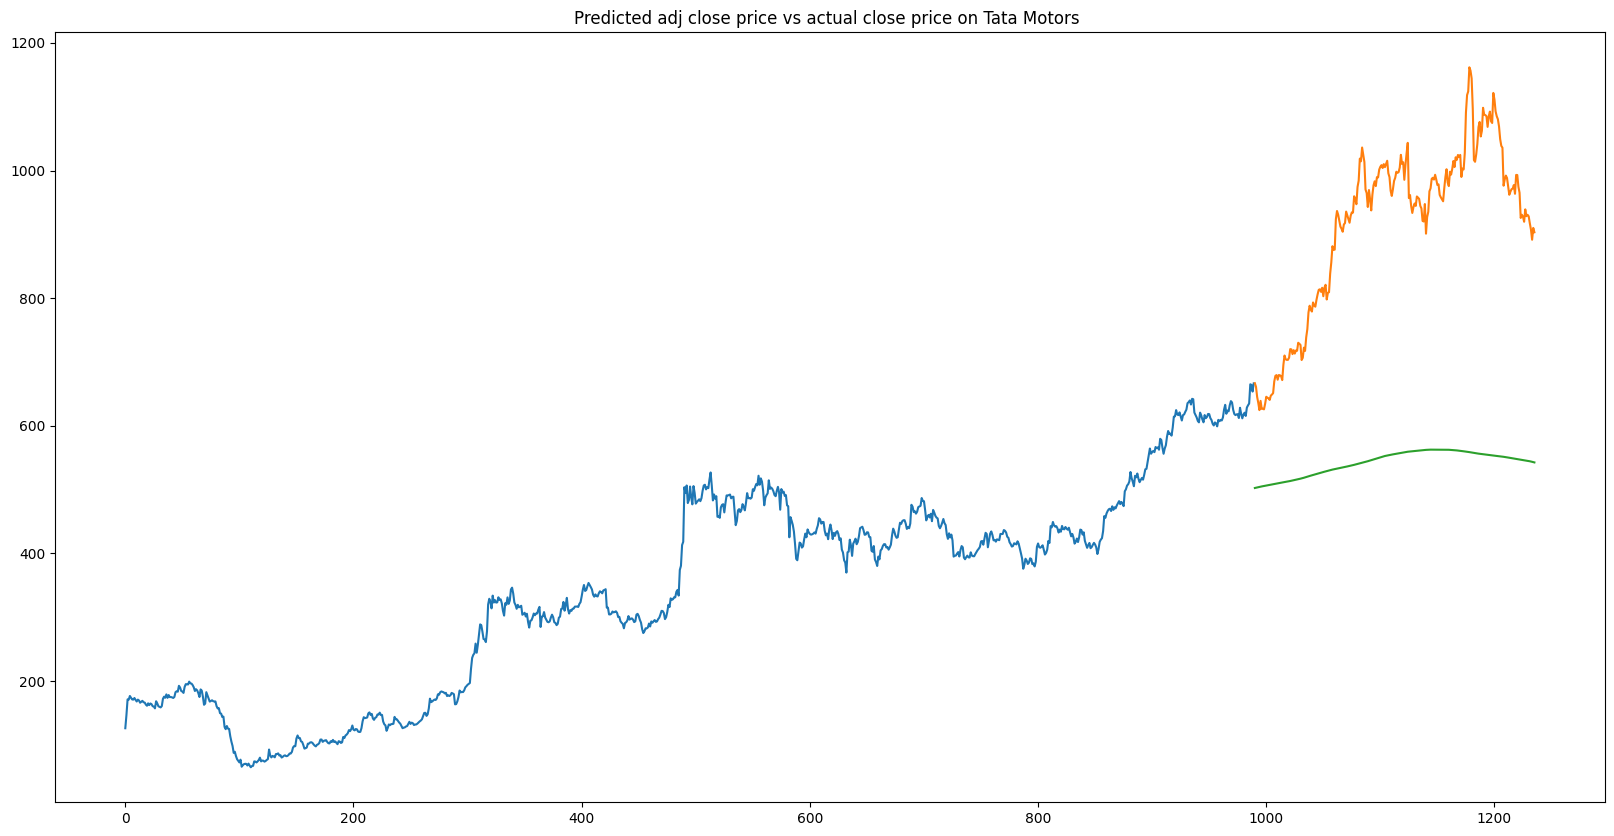

In [5]:
tata.index=tcs['Date']

tata_df = tata.sort_index(ascending=True, axis=0)
tata_new = pd.DataFrame(index=range(0, len(tata)), columns=['Date', 'Adj Close'])

for i in range(0,len(tata_df)):
    tata_new['Date'][i] = tata_df['Date'][i]
    tata_new['Adj Close'][i] = tata_df['Adj Close'][i]

#splitting training and validation dataset
train = tata_new[:990]
valid = tata_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on Tata Motors ');

(990, 2)
(246, 2)

RMSE value on validation set:
5.948246761716828


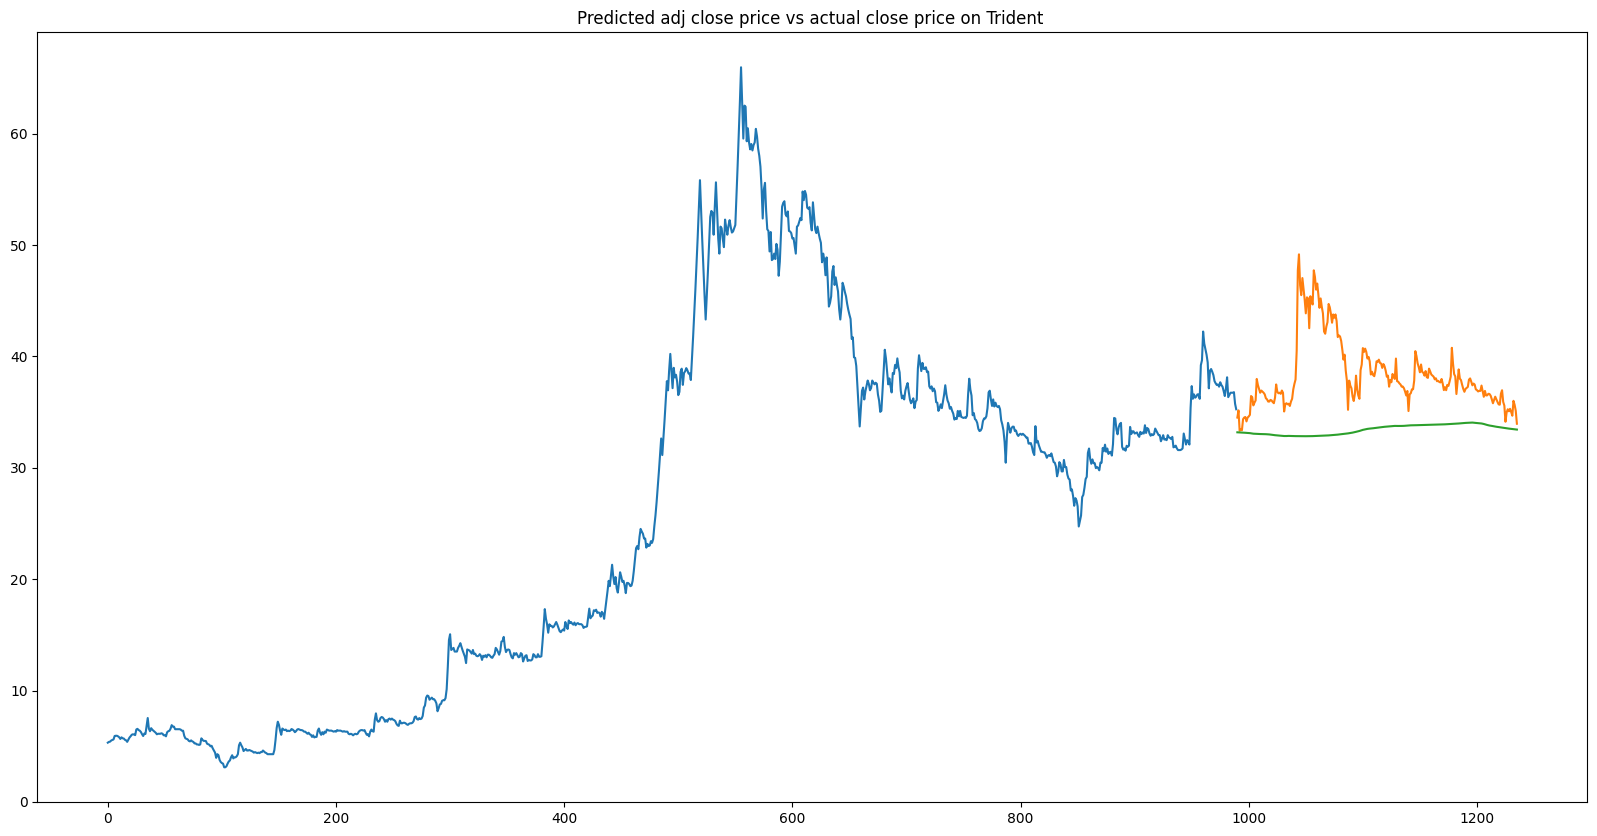

In [6]:
trident.index=trident['Date']

trident_df = trident.sort_index(ascending=True, axis=0)
trident_new = pd.DataFrame(index=range(0, len(trident)), columns=['Date', 'Adj Close'])

for i in range(0,len(trident_df)):
    trident_new['Date'][i] = trident_df['Date'][i]
    trident_new['Adj Close'][i] = trident_df['Adj Close'][i]

#splitting training and validation dataset
train = trident_new[:990]
valid = trident_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on Trident ');

In [7]:
#create features

tcs_new['Date'] = tcs_new['Date'].astype('datetime64[ns]')
tcs_new["Year"] = tcs_new.Date.dt.year
tcs_new["Month"] = tcs_new.Date.dt.month
tcs_new["Day"] = tcs_new.Date.dt.day
tcs_new["DayOfWeek"] = tcs_new.Date.dt.dayofweek
tcs_new["DayOfYear"] = tcs_new.Date.dt.dayofyear

tcs_new.drop('Date', axis=1,inplace=True)

Model Fitted!
RMSE is 730.9284058189014


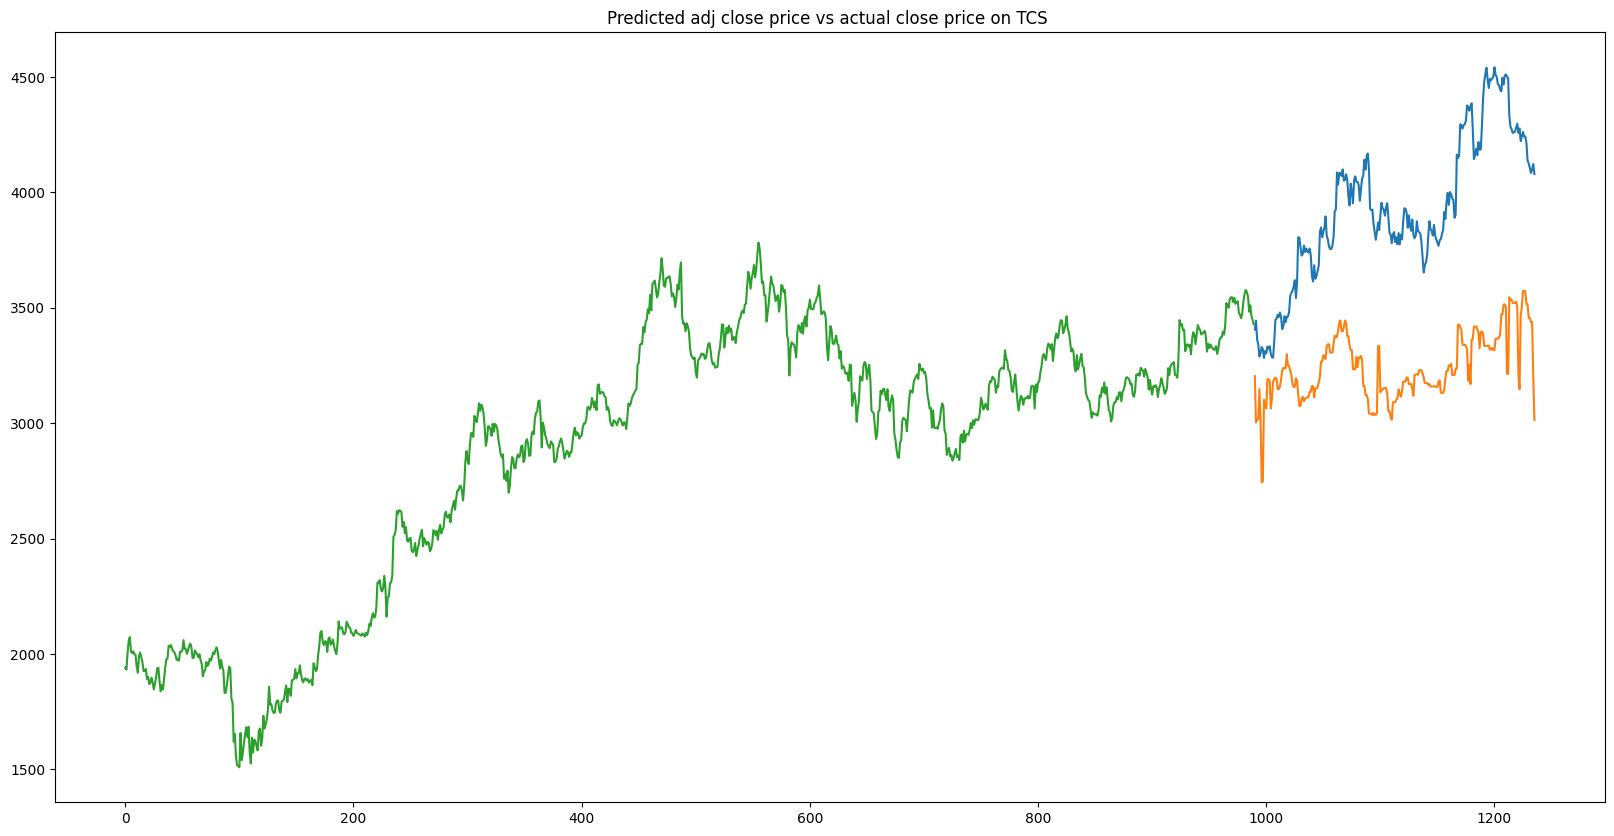

In [8]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

#split into train and validation
train = tcs_new[:990]
valid = tcs_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on TCS ');

In [9]:
#create features

tata_new['Date'] = tata_new['Date'].astype('datetime64[ns]')
tata_new["Year"] = tata_new.Date.dt.year
tata_new["Month"] = tata_new.Date.dt.month
tata_new["Day"] = tata_new.Date.dt.day
tata_new["DayOfWeek"] = tata_new.Date.dt.dayofweek
tata_new["DayOfYear"] = tata_new.Date.dt.dayofyear

tata_new.drop('Date', axis=1,inplace=True)

Model Fitted!
RMSE is 430.58416331913656


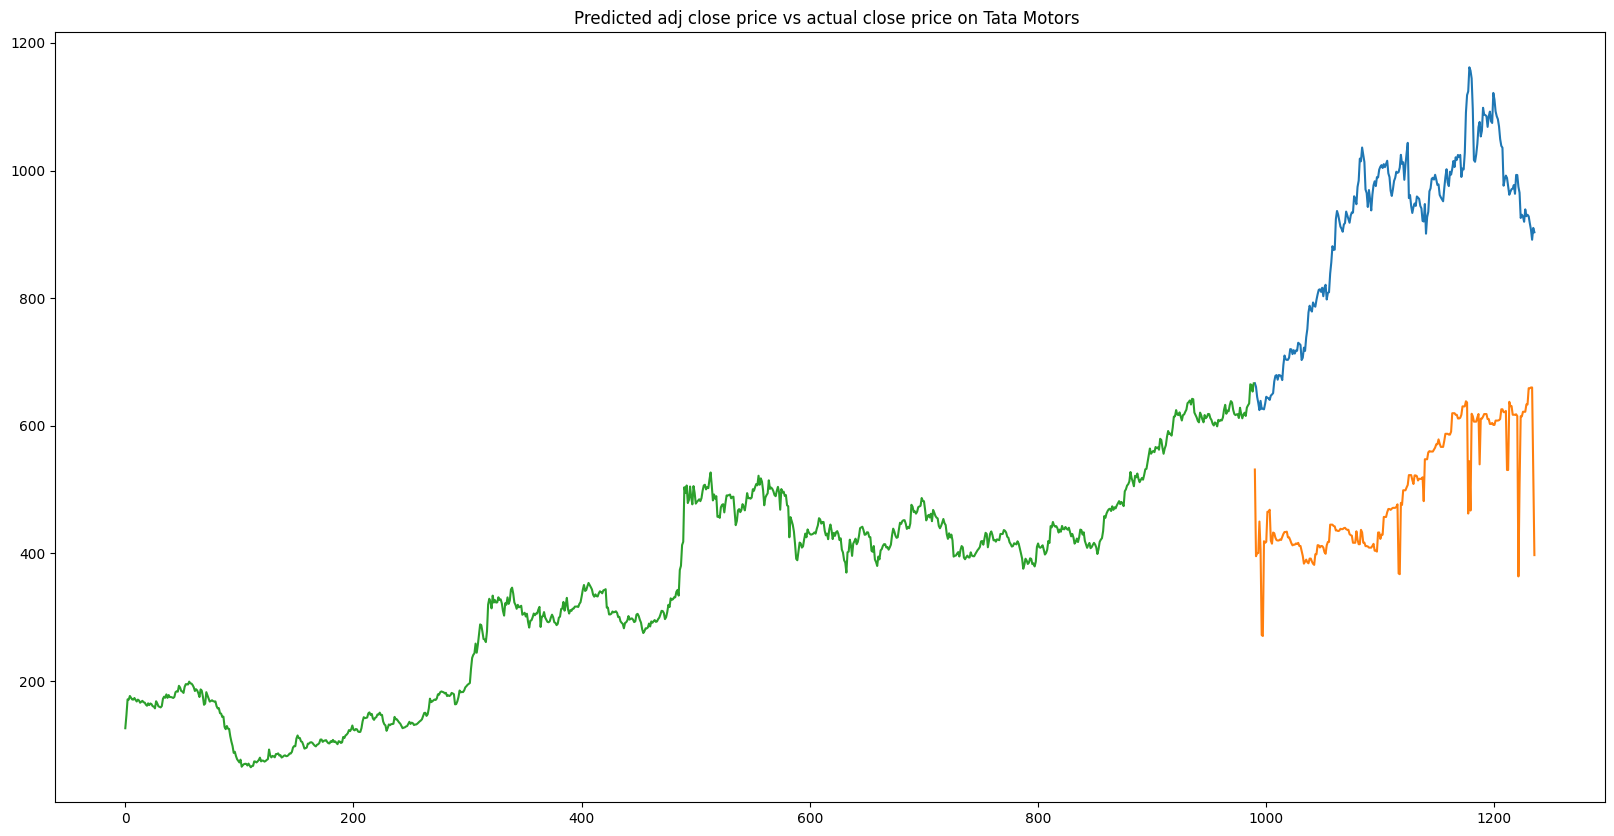

In [10]:
#split into train and validation
train = tata_new[:990]
valid = tata_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on Tata Motors ');

In [11]:
#create features

trident_new['Date'] = trident_new['Date'].astype('datetime64[ns]')
trident_new["Year"] = trident_new.Date.dt.year
trident_new["Month"] = trident_new.Date.dt.month
trident_new["Day"] = trident_new.Date.dt.day
trident_new["DayOfWeek"] = trident_new.Date.dt.dayofweek
trident_new["DayOfYear"] = trident_new.Date.dt.dayofyear

trident_new.drop('Date', axis=1,inplace=True)

Model Fitted!
RMSE is 7.16063900348482


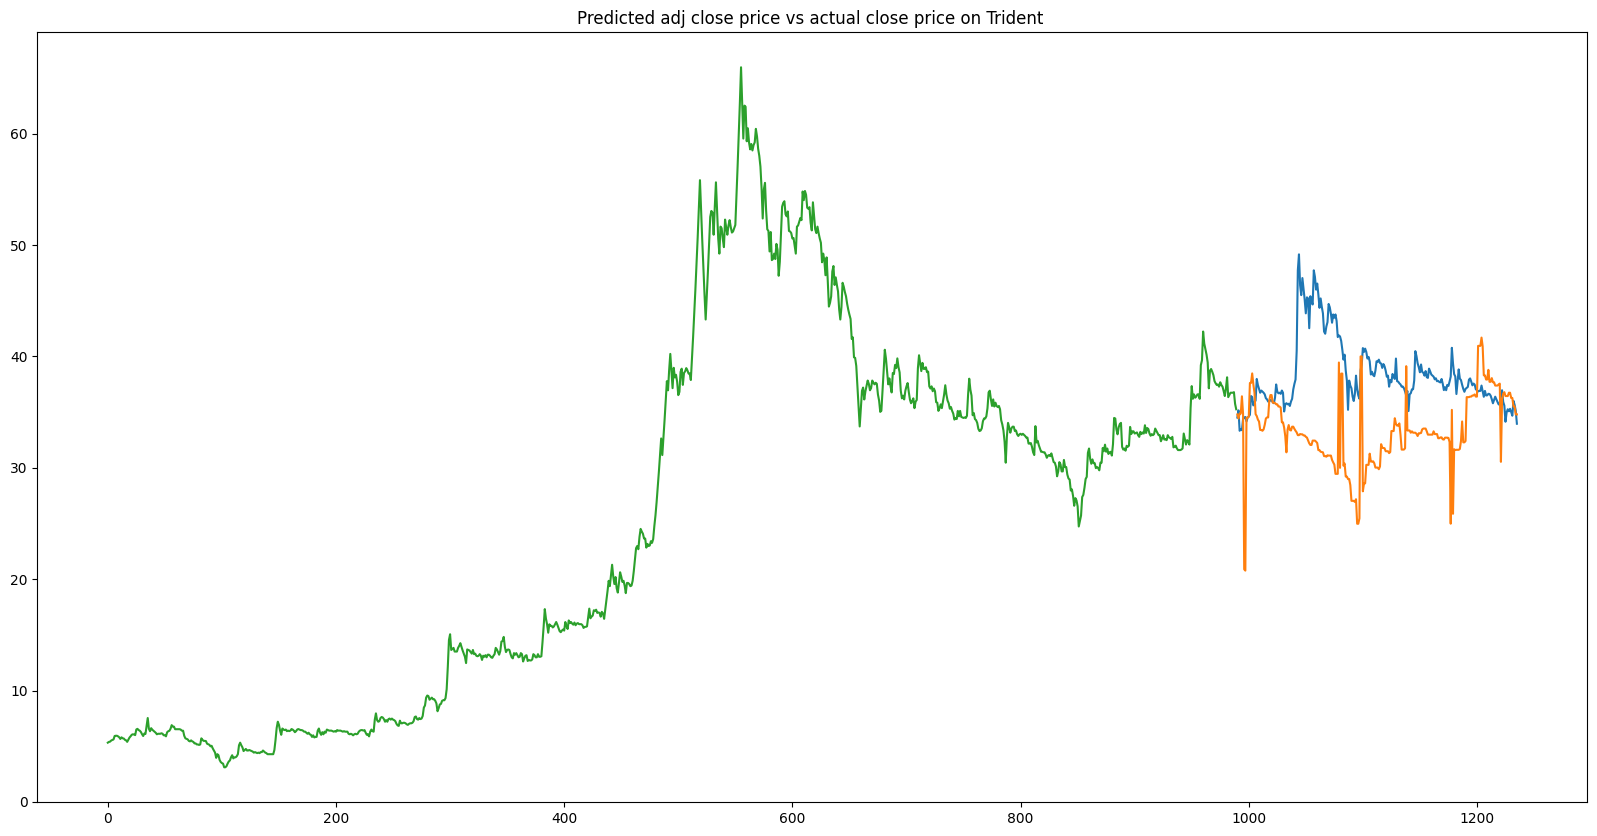

In [12]:
#split into train and validation
train = trident_new[:990]
valid = trident_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on Trident ');

Model Fitted!
RMSE is 233.74265042231022


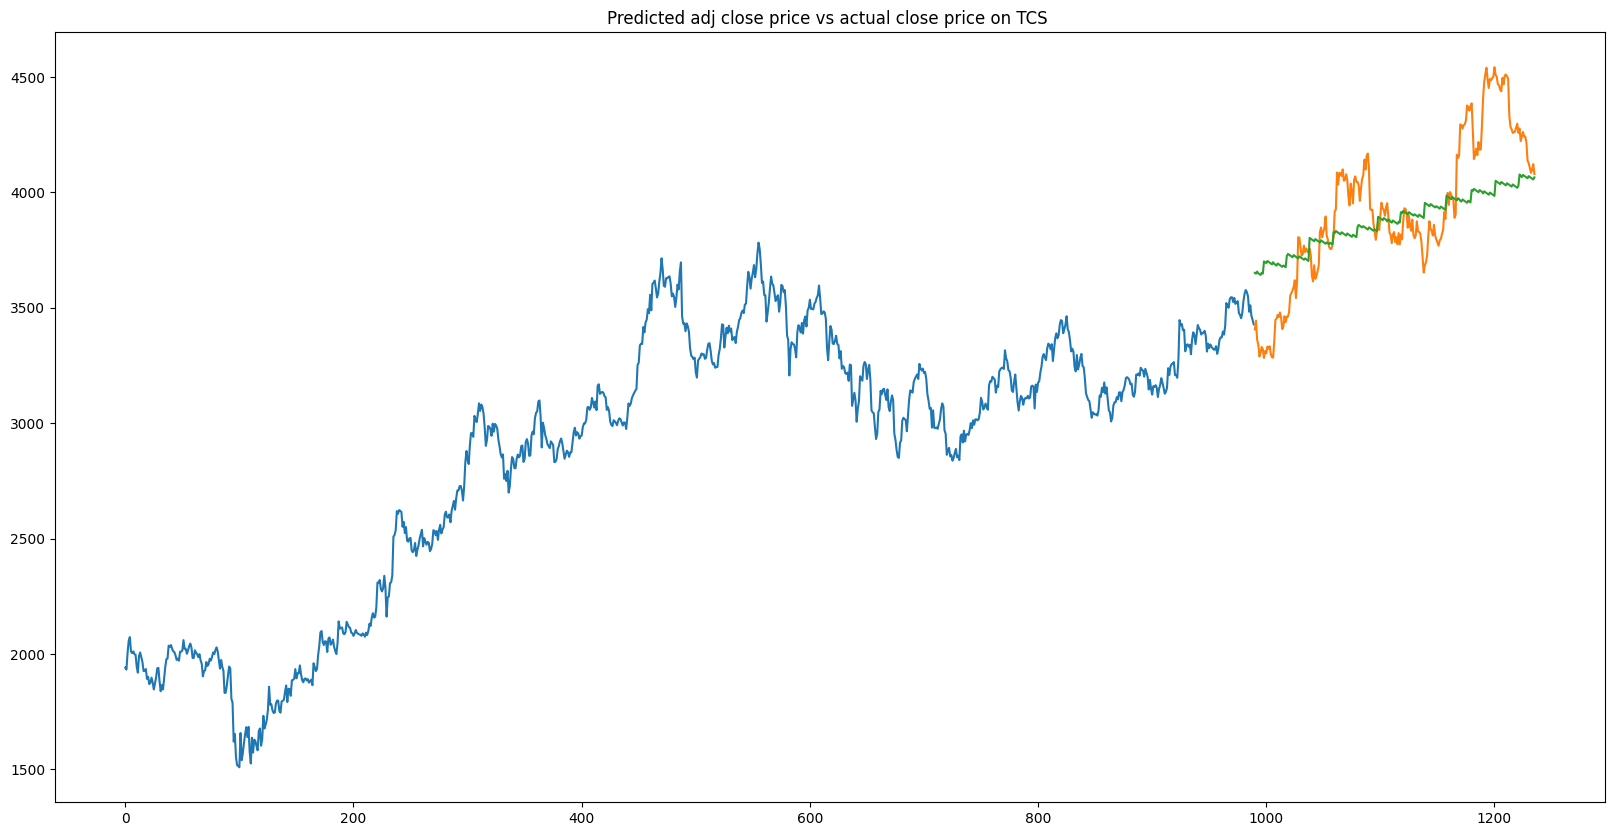

In [13]:
#split into train and validation
train = tcs_new[:990]
valid = tcs_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = tcs_new[990:].index
train.index = tcs_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on TCS ');

Model Fitted!
RMSE is 286.934025381601


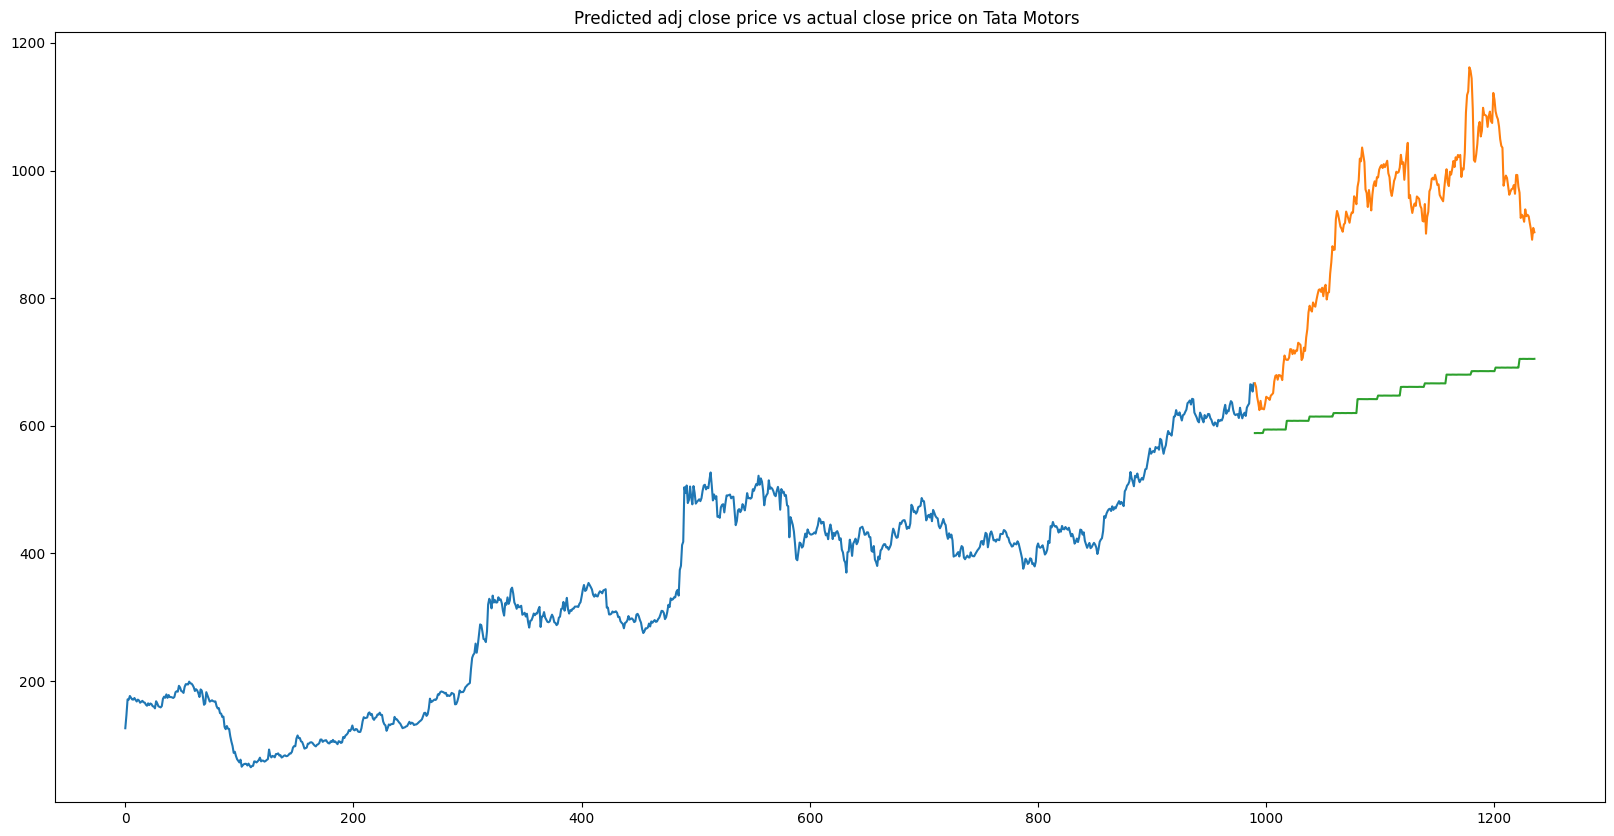

In [14]:
#split into train and validation
train = tata_new[:990]
valid = tata_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = tata_new[990:].index
train.index = tata_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on Tata Motors ');

Model Fitted!
RMSE is 13.997853279222035


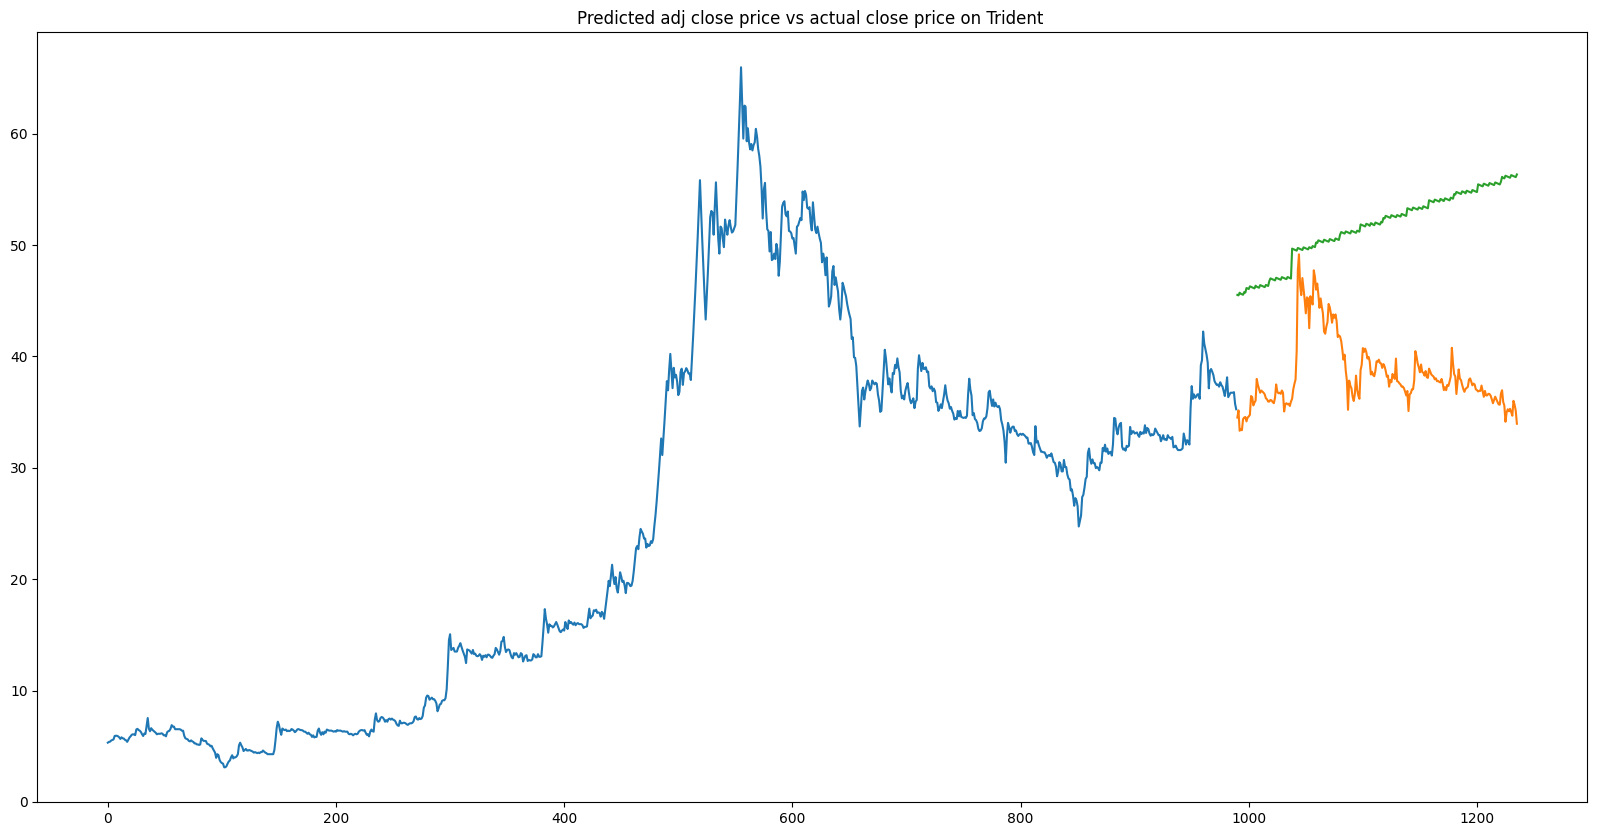

In [15]:
#split into train and validation
train = trident_new[:990]
valid = trident_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = trident_new[990:].index
train.index = trident_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on Trident ');

930/930 - 31s - 33ms/step - loss: 0.0027
Fitting Model
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step
RMSE is 111.94485428850508


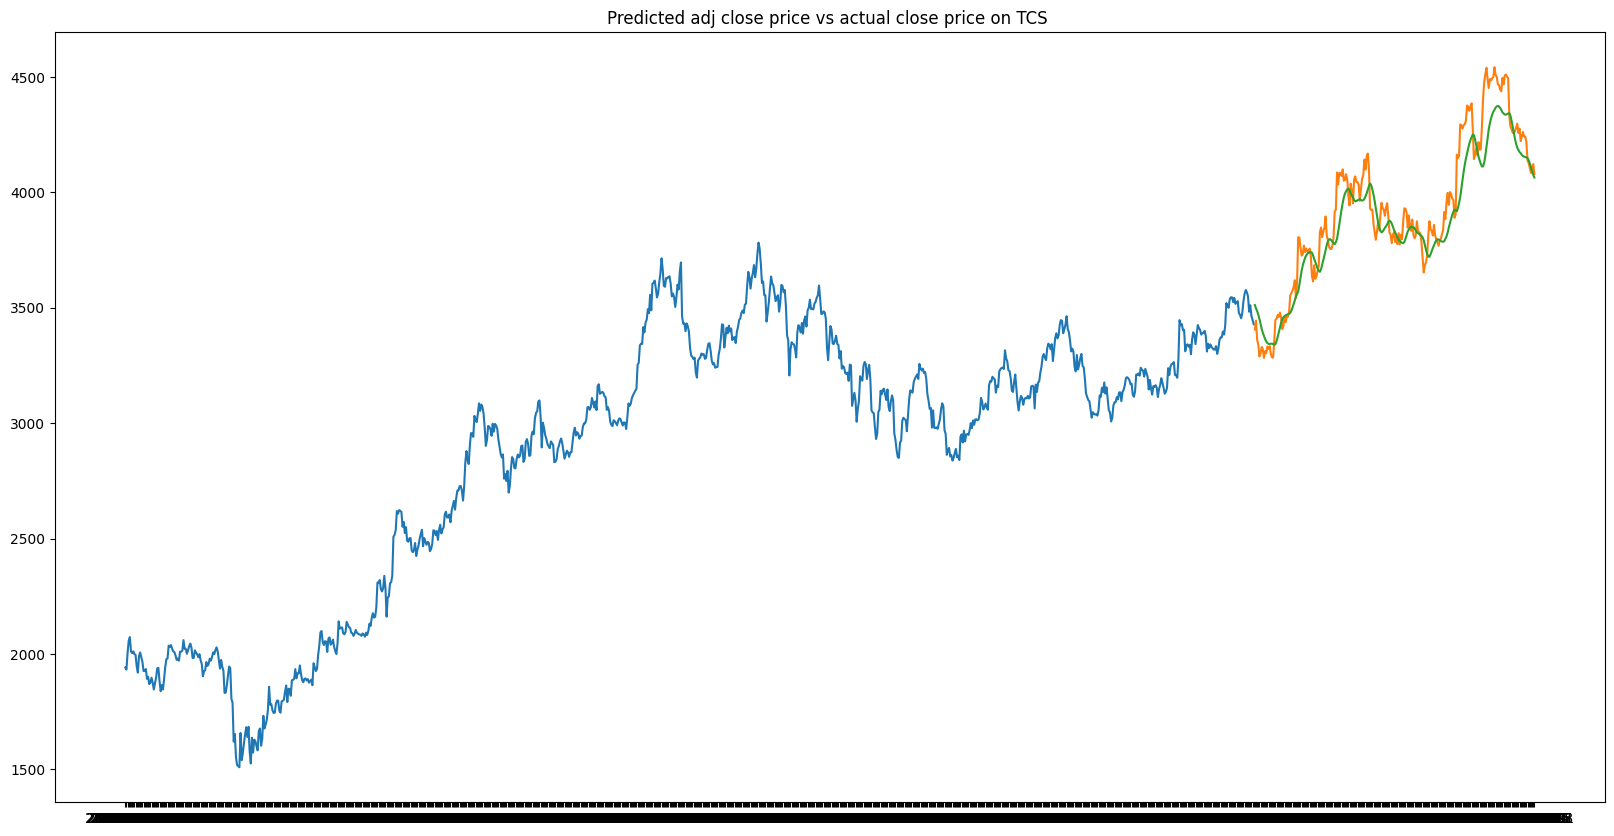

In [16]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
#creating dataframe
tcs_lstm = pd.DataFrame(index=range(0,len(tcs_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(tcs_df)):
    tcs_lstm['Date'][i] = tcs_df['Date'][i]
    tcs_lstm['Adj Close'][i] = tcs_df['Adj Close'][i]

#setting index
tcs_lstm.index = tcs_lstm.Date
tcs_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = tcs_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = tcs_lstm[len(tcs_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = tcs_lstm[:990]
valid = tcs_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on TCS ');

930/930 - 27s - 29ms/step - loss: 9.8725e-04
Fitting Model
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
RMSE is 43.10104527433238


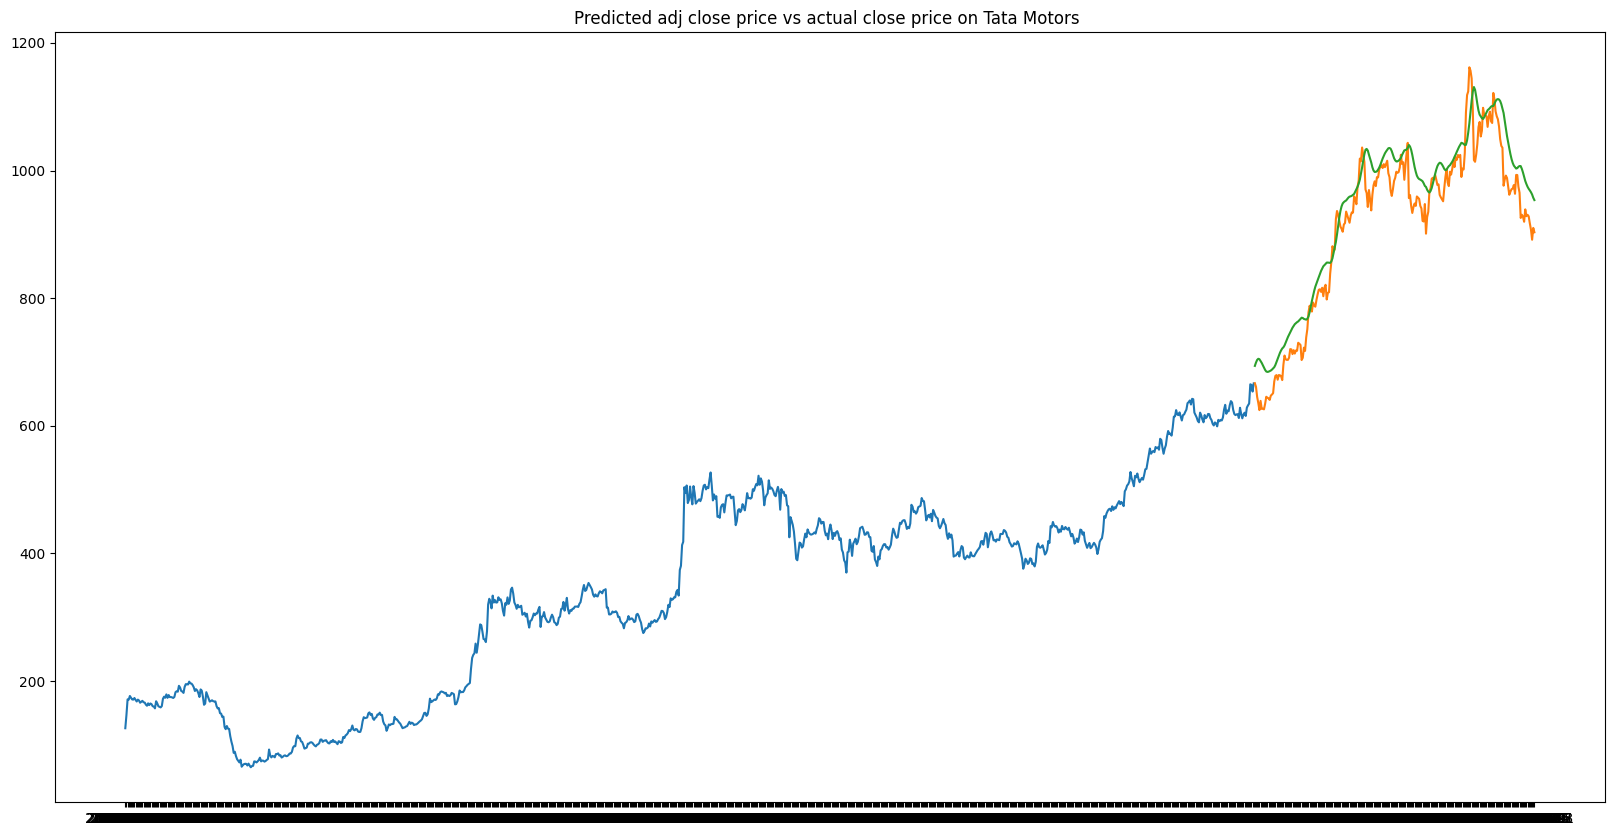

In [17]:
#creating dataframe
tata_lstm = pd.DataFrame(index=range(0,len(tata_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(tata_df)):
    tata_lstm['Date'][i] = tata_df['Date'][i]
    tata_lstm['Adj Close'][i] = tata_df['Adj Close'][i]

#setting index
tata_lstm.index = tata_lstm.Date
tata_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = tata_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = tata_lstm[len(tata_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = tata_lstm[:990]
valid = tata_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on Tata Motors ');

930/930 - 27s - 29ms/step - loss: 0.0034
Fitting Model


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
RMSE is 3.2837904121027774


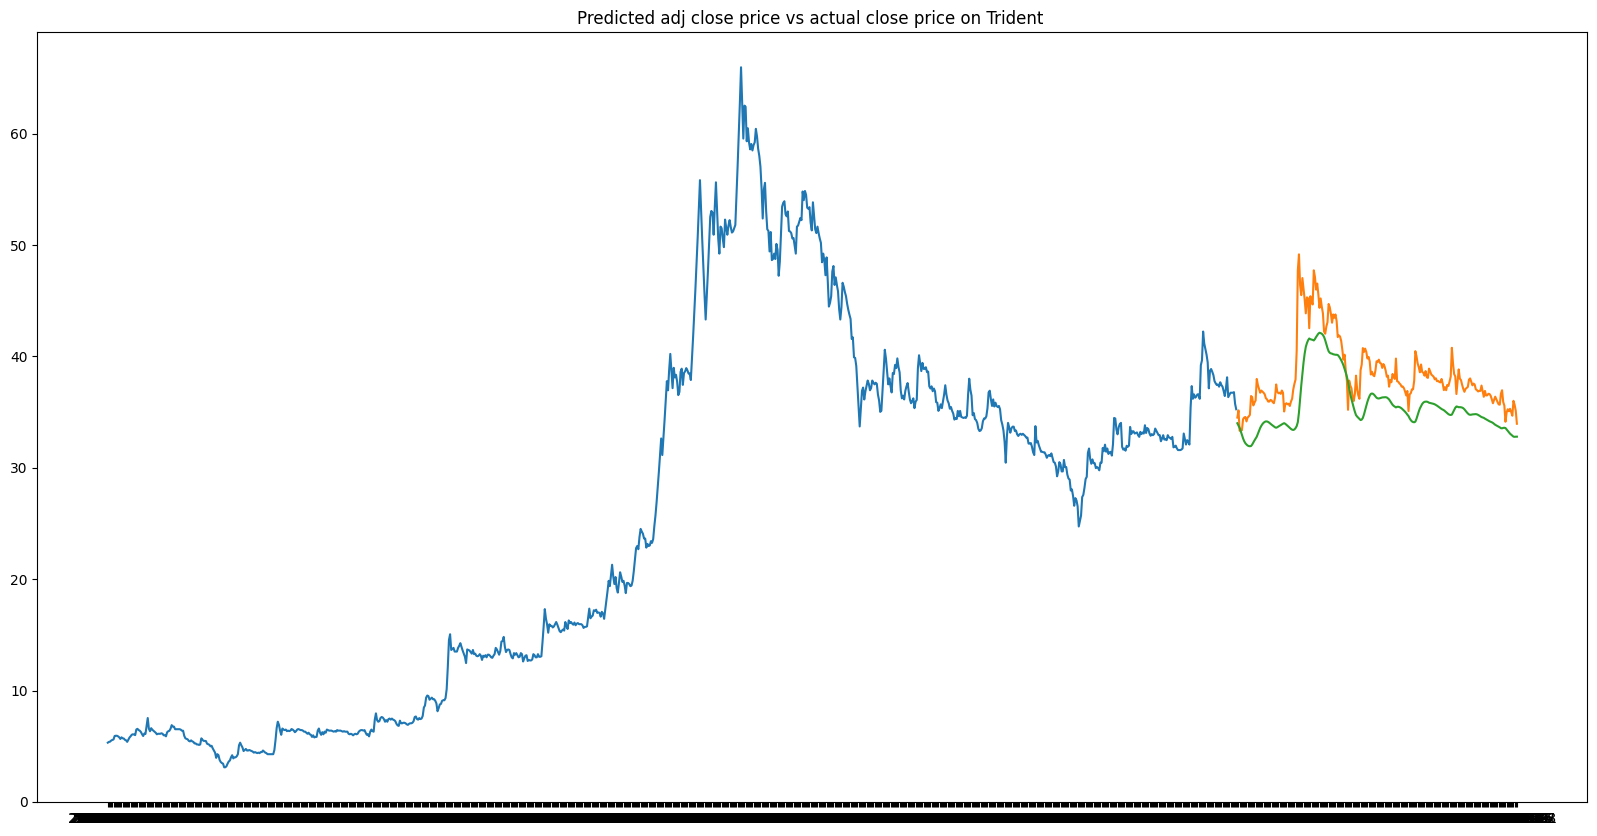

In [18]:
#creating dataframe
tri_lstm = pd.DataFrame(index=range(0,len(trident_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(trident_df)):
    tri_lstm['Date'][i] = trident_df['Date'][i]
    tri_lstm['Adj Close'][i] = trident_df['Adj Close'][i]

#setting index
tri_lstm.index = tri_lstm.Date
tri_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = tri_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = tri_lstm[len(tri_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = tri_lstm[:990]
valid = tri_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on Trident ');